In [1]:
import pandas as pd

df = pd.read_parquet("data/transaction_fraud_data.parquet")
df.head()

,transaction_id,customer_id,card_number,timestamp,vendor_category,vendor_type,vendor,amount,currency,country,...,is_card_present,device,channel,device_fingerprint,ip_address,is_outside_home_country,is_high_risk_vendor,is_weekend,last_hour_activity,is_fraud
0,TX_a0ad2a2a,CUST_72886,6646734767813109,2024-09-30 00:00:01.034820,Restaurant,fast_food,Taco Bell,294.87,GBP,UK,...,False,iOS App,mobile,e8e6160445c935fd0001501e4cbac8bc,197.153.60.199,False,False,False,"{'num_transactions': 1197, 'total_amount': 334...",False
1,TX_3599c101,CUST_70474,376800864692727,2024-09-30 00:00:01.764464,Entertainment,gaming,Steam,3368.97,BRL,Brazil,...,False,Edge,web,a73043a57091e775af37f252b3a32af9,208.123.221.203,True,True,False,"{'num_transactions': 509, 'total_amount': 2011...",True
2,TX_a9461c6d,CUST_10715,5251909460951913,2024-09-30 00:00:02.273762,Grocery,physical,Whole Foods,102582.38,JPY,Japan,...,False,Firefox,web,218864e94ceaa41577d216b149722261,10.194.159.204,False,False,False,"{'num_transactions': 332, 'total_amount': 3916...",False
3,TX_7be21fc4,CUST_16193,376079286931183,2024-09-30 00:00:02.297466,Gas,major,Exxon,630.60,AUD,Australia,...,False,iOS App,mobile,70423fa3a1e74d01203cf93b51b9631d,17.230.177.225,False,False,False,"{'num_transactions': 764, 'total_amount': 2201...",False
4,TX_150f490b,CUST_87572,6172948052178810,2024-09-30 00:00:02.544063,Healthcare,medical,Medical Center,724949.27,NGN,Nigeria,...,False,Chrome,web,9880776c7b6038f2af86bd4e18a1b1a4,136.241.219.151,True,False,False,"{'num_transactions': 218, 'total_amount': 4827...",True


In [2]:
len(df)

7483766

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7483766 entries, 0 to 7483765
Data columns (total 23 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   transaction_id           object        
 1   customer_id              object        
 2   card_number              int64         
 3   timestamp                datetime64[us]
 4   vendor_category          object        
 5   vendor_type              object        
 6   vendor                   object        
 7   amount                   float64       
 8   currency                 object        
 9   country                  object        
 10  city                     object        
 11  city_size                object        
 12  card_type                object        
 13  is_card_present          bool          
 14  device                   object        
 15  channel                  object        
 16  device_fingerprint       object        
 17  ip_address               ob

In [5]:
df.isnull().sum()

transaction_id             0
customer_id                0
card_number                0
timestamp                  0
vendor_category            0
vendor_type                0
vendor                     0
amount                     0
currency                   0
country                    0
city                       0
city_size                  0
card_type                  0
is_card_present            0
device                     0
channel                    0
device_fingerprint         0
ip_address                 0
is_outside_home_country    0
is_high_risk_vendor        0
is_weekend                 0
last_hour_activity         0
is_fraud                   0
dtype: int64

In [3]:
df_sample = df.sample(n=10000)

In [4]:
from ydata_profiling import ProfileReport
import pandas as pd

report = ProfileReport(df_sample)
report.to_file('report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 23/23 [01:04<00:00,  2.81s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Топ-10 категорий по 'vendor_category' с is_fraud=True:
vendor_category
Travel           187477
Grocery          186987
Restaurant       186951
Entertainment    186890
Gas              186829
Healthcare       186769
Retail           186613
Education        186203
Name: count, dtype: int64


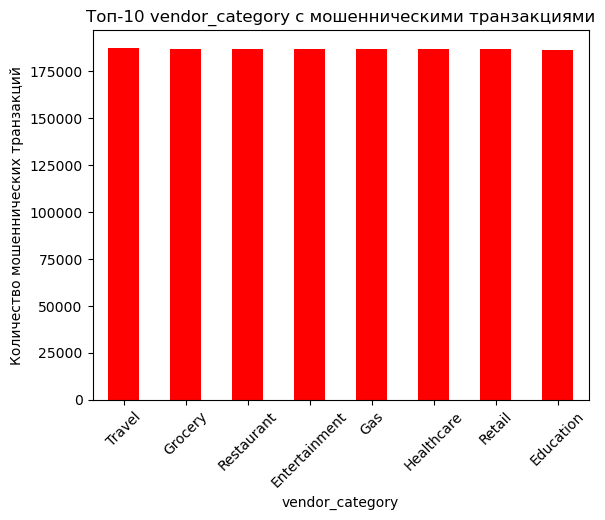

Топ-10 категорий по 'vendor_type' с is_fraud=True:
vendor_type
online       279363
physical     187200
pharmacy      93569
major         93416
local         93413
supplies      93240
medical       93200
fast_food     62786
events        62525
streaming     62206
Name: count, dtype: int64


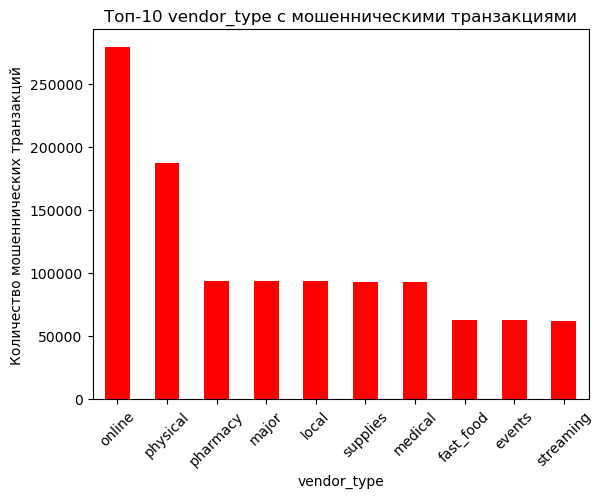

Топ-10 категорий по 'vendor' с is_fraud=True:
vendor
Local Gas Station       31205
Truck Stop              31192
Chegg                   31171
University Bookstore    31136
Highway Gas Stop        31016
Barnes & Noble          30933
DuaneReade              23513
CVS Pharmacy            23508
Walmart Grocery         23475
Medical Center          23464
Name: count, dtype: int64


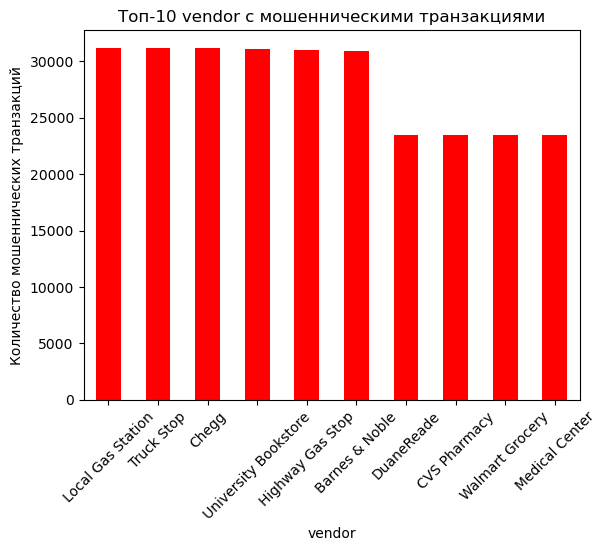

Топ-10 категорий по 'city' с is_fraud=True:
city
Unknown City    1457407
Phoenix            3786
San Jose           3777
Los Angeles        3771
San Diego          3771
Philadelphia       3739
San Antonio        3736
Chicago            3701
New York           3696
Houston            3687
Name: count, dtype: int64


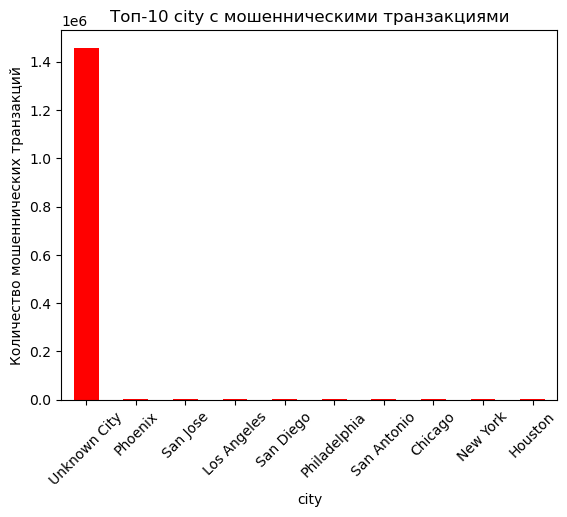

Топ-10 категорий по 'currency' с is_fraud=True:
currency
RUB    299425
MXN    298841
BRL    298629
NGN    298600
EUR     74631
AUD     37652
JPY     37592
SGD     37414
GBP     37345
USD     37312
Name: count, dtype: int64


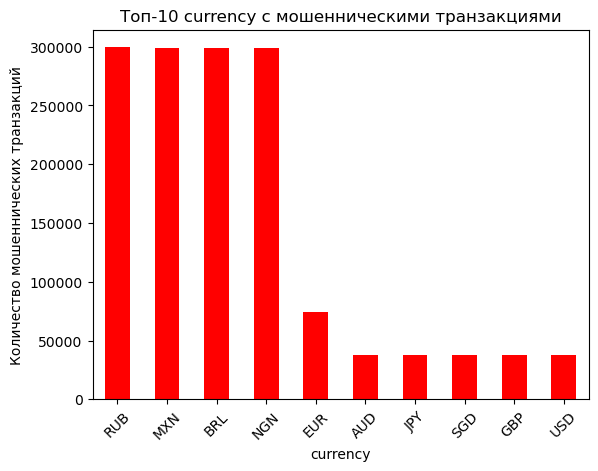

Топ-10 категорий по 'device' с is_fraud=True:
device
Chip Reader        217324
Magnetic Stripe    217204
NFC Payment        216519
Firefox            142171
Safari             141379
Android App        140844
iOS App            140306
Chrome             140087
Edge               138885
Name: count, dtype: int64


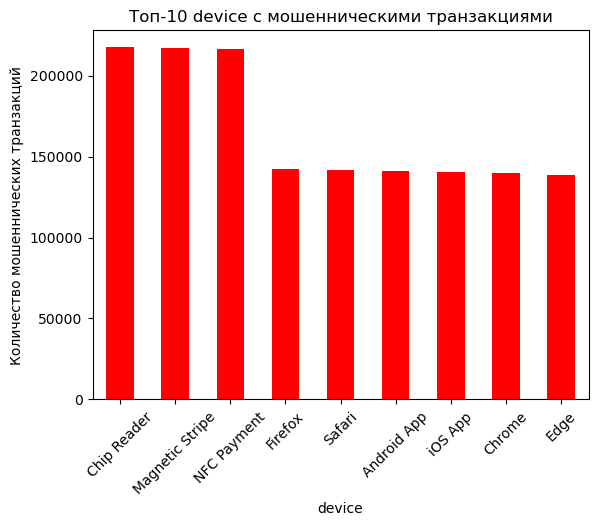

Топ-10 категорий по 'channel' с is_fraud=True:
channel
pos       651047
web       562522
mobile    281150
Name: count, dtype: int64


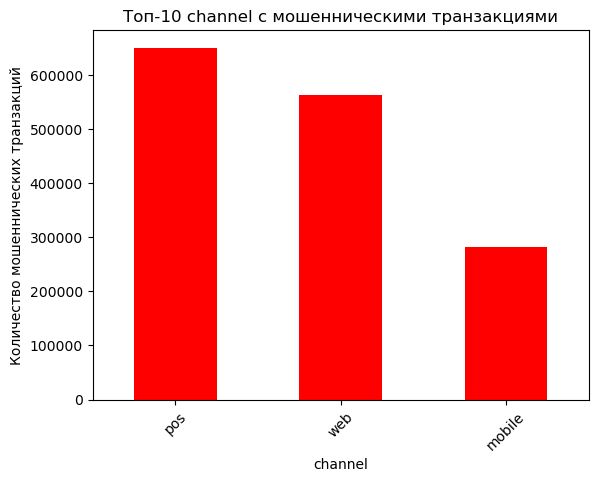

Топ-10 категорий по 'card_type' с is_fraud=True:
card_type
Basic Debit        309239
Premium Debit      307502
Platinum Credit    306190
Gold Credit        289060
Basic Credit       282728
Name: count, dtype: int64


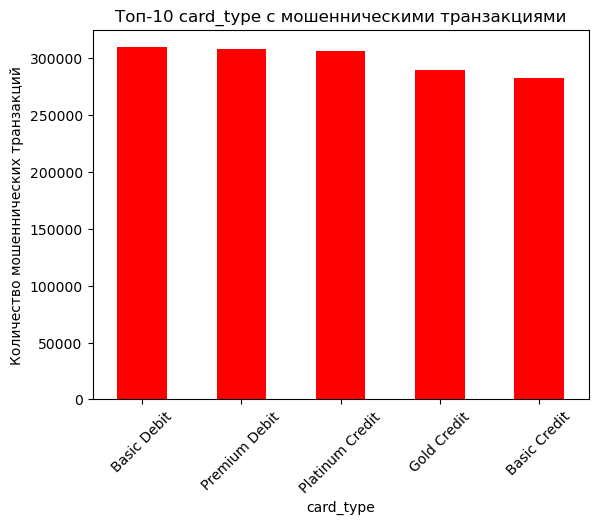

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_top_fraud_categories(df, column, top_n=10):
    """
    Строит топ-N категорий по количеству мошеннических транзакций (is_fraud=True).

    Параметры:
    df       : DataFrame с данными
    column   : категориальный столбец, по которому анализируем
    top_n    : количество топ категорий для отображения
    """
    # Фильтруем только мошеннические транзакции
    fraud_df = df[df['is_fraud'] == True]

    # Считаем количество по категориям
    top_categories = fraud_df[column].value_counts().head(top_n)

    print(f"Топ-{top_n} категорий по '{column}' с is_fraud=True:")
    print(top_categories)

    # Строим график
    top_categories.plot(kind='bar', color='red')
    plt.title(f"Топ-{top_n} {column} с мошенническими транзакциями")
    plt.ylabel('Количество мошеннических транзакций')
    plt.xlabel(column)
    plt.xticks(rotation=45)
    plt.show()


# Список категориальных признаков, которые хотим проверить
categorical_columns = ['vendor_category', 'vendor_type', 'vendor', 'city', 'currency', 'device', 'channel', 'card_type']

# Генерируем графики для всех категориальных колонок

for col in categorical_columns:
    plot_top_fraud_categories(df, col)
